In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("/home/bench/Documents/projects/ML-zoomcamp-Homework/ML_project/data/ad_10000records.csv")


In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,gender,country,timestamp,clicked_on_ad
0,62.26,32.0,69481.85,172.83,decentralized_real-time_circuit,lisafort,male,svalbard_&_jan_mayen_islands,2016-06-09_21:43:05,0
1,41.73,31.0,61840.26,207.17,optional_full-range_projection,west_angelabury,male,singapore,2016-01-16_17:56:05,0
2,44.40,30.0,57877.15,172.83,total_5thgeneration_standardization,reyesfurt,female,guadeloupe,2016-06-29_10:50:45,0
3,59.88,28.0,56180.93,207.17,balanced_empowering_success,new_michael,female,zambia,2016-06-21_14:32:32,0
4,49.21,30.0,54324.73,201.58,total_5thgeneration_standardization,west_richard,female,qatar,2016-07-21_10:54:35,1


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
daily_time_spent_on_site,10000.0,61.660757,15.704142,32.60,48.8600,59.59,76.58,90.97
age,10000.0,35.940100,8.572973,19.00,29.0000,35.00,42.00,60.00
area_income,10000.0,53840.047721,13343.708718,13996.50,44052.3025,56180.93,61840.26,79332.33
daily_internet_usage,10000.0,177.759831,40.820951,105.22,140.1500,178.92,212.67,269.96
clicked_on_ad,10000.0,0.491700,0.499956,0.00,0.0000,0.00,1.00,1.00


In [8]:
# Inspect the dataset
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Dataset Head:
    daily_time_spent_on_site   age  area_income  daily_internet_usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         ad_topic_line             city  gender  \
0      decentralized_real-time_circuit         lisafort    male   
1       optional_full-range_projection  west_angelabury    male   
2  total_5thgeneration_standardization        reyesfurt  female   
3          balanced_empowering_success      new_michael  female   
4  total_5thgeneration_standardization     west_richard  female   

                        country            timestamp  clicked_on_ad  
0  svalbard_&_jan_mayen_islands  2016-06-09_21:43:05              0  
1        

In [9]:
# checking null values
df.isnull().sum()

daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
ad_topic_line               0
city                        0
gender                      0
country                     0
timestamp                   0
clicked_on_ad               0
dtype: int64

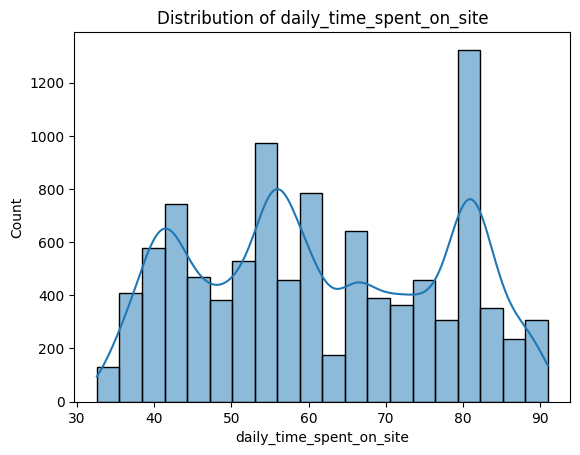

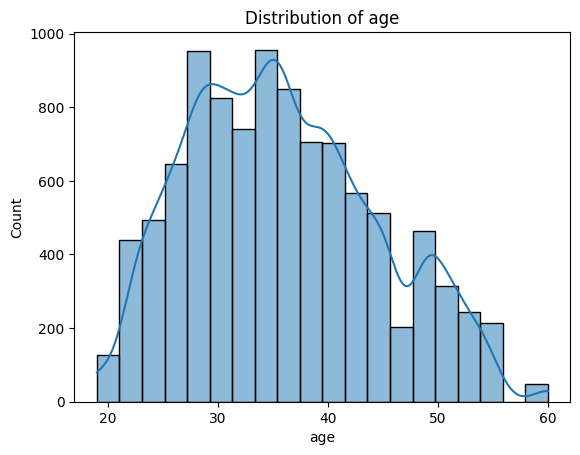

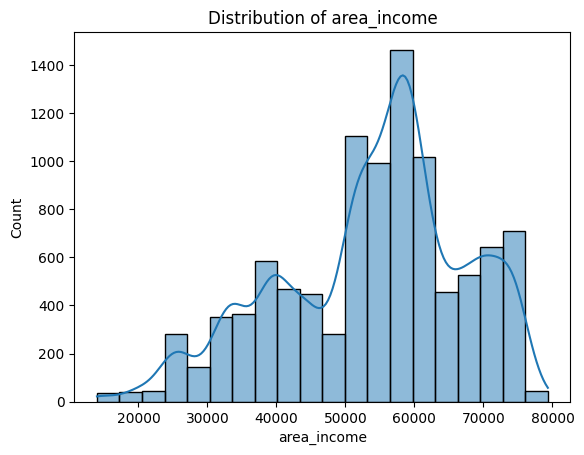

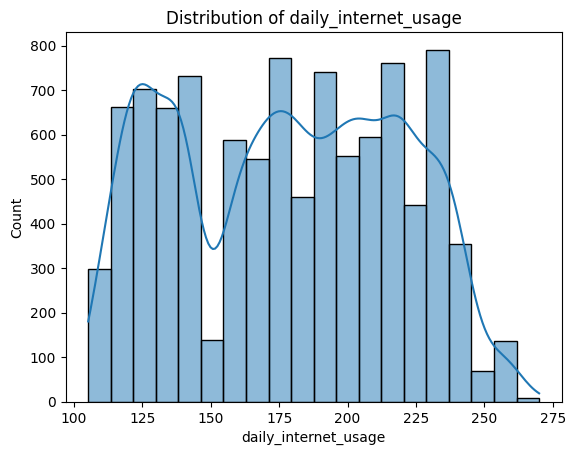

In [10]:
# Distribution of numerical columns
numerical_columns = ['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage']
for col in numerical_columns:
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

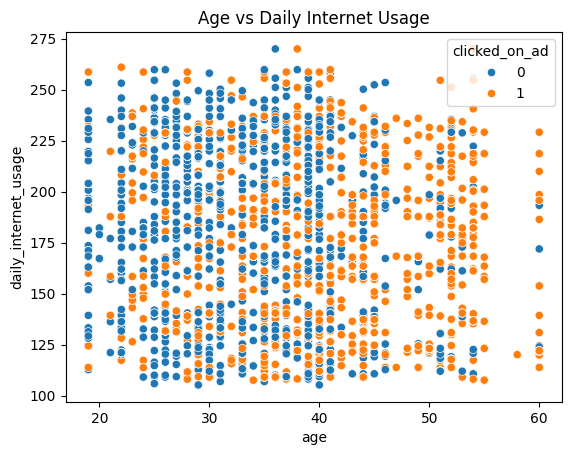

In [11]:
# Scatterplot: Age vs Daily Internet Usage
sns.scatterplot(x='age', y='daily_internet_usage', hue='clicked_on_ad', data=df)
plt.title("Age vs Daily Internet Usage")
plt.show()

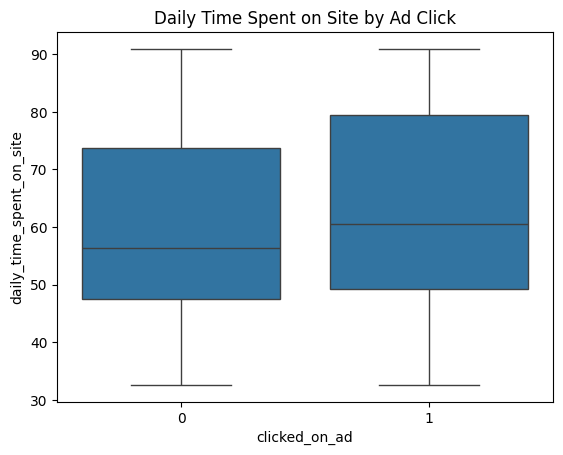

In [12]:

# Boxplot: Daily time spent on site by Clicked on Ad
sns.boxplot(x='clicked_on_ad', y='daily_time_spent_on_site', data=df)
plt.title("Daily Time Spent on Site by Ad Click")
plt.show()

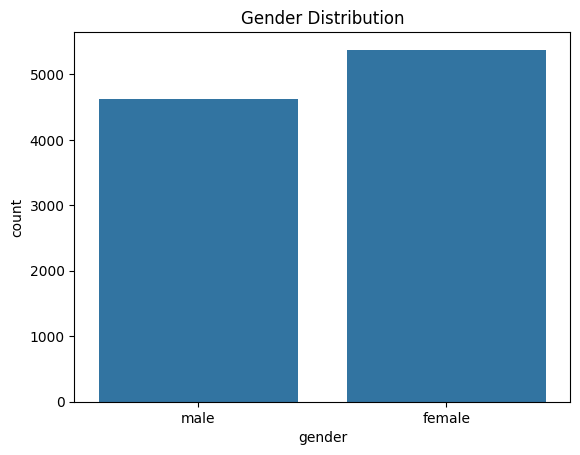

In [13]:

# Countplot for 'gender'
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

/tmp/ipykernel_103758/4225959640.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


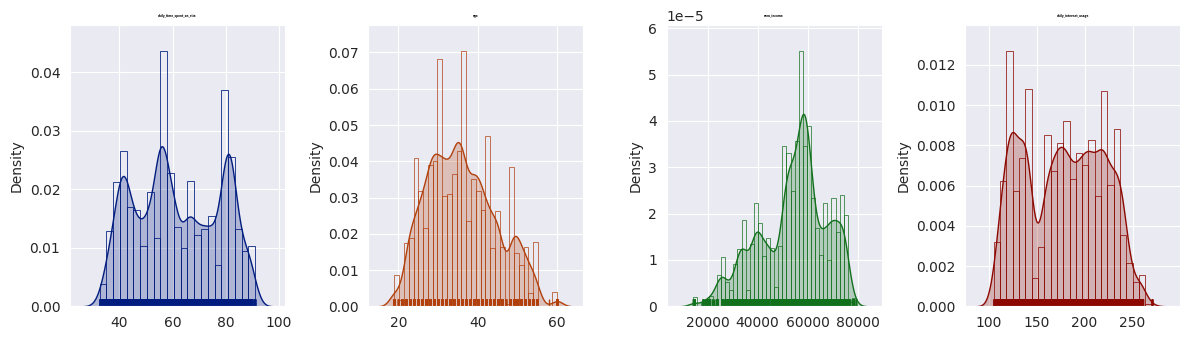

In [14]:
sns.set_style(style = "darkgrid")
colors = sns.color_palette(palette = 'dark', n_colors = 4)

numerical_columns = ['daily_time_spent_on_site', 
                      'age', 
                      'area_income', 
                      'daily_internet_usage']

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 3.5))
axs = axs.flat

for i,col in enumerate(numerical_columns):
    sns.histplot(df, x = col, stat = 'density', color = colors[i], fill = False, ax = axs[i])
    sns.rugplot(df, x = col, color = colors[i], ax = axs[i])
    sns.kdeplot(df, x = col, color = colors[i], fill = True, ax = axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(f"{col}", fontsize = 2, fontweight = 'bold', color = 'black')
    
fig.tight_layout()
fig.show()

/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/bench/Documents/projects/ML-zoomcamp-Homework/env/lib/python3.13/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palett

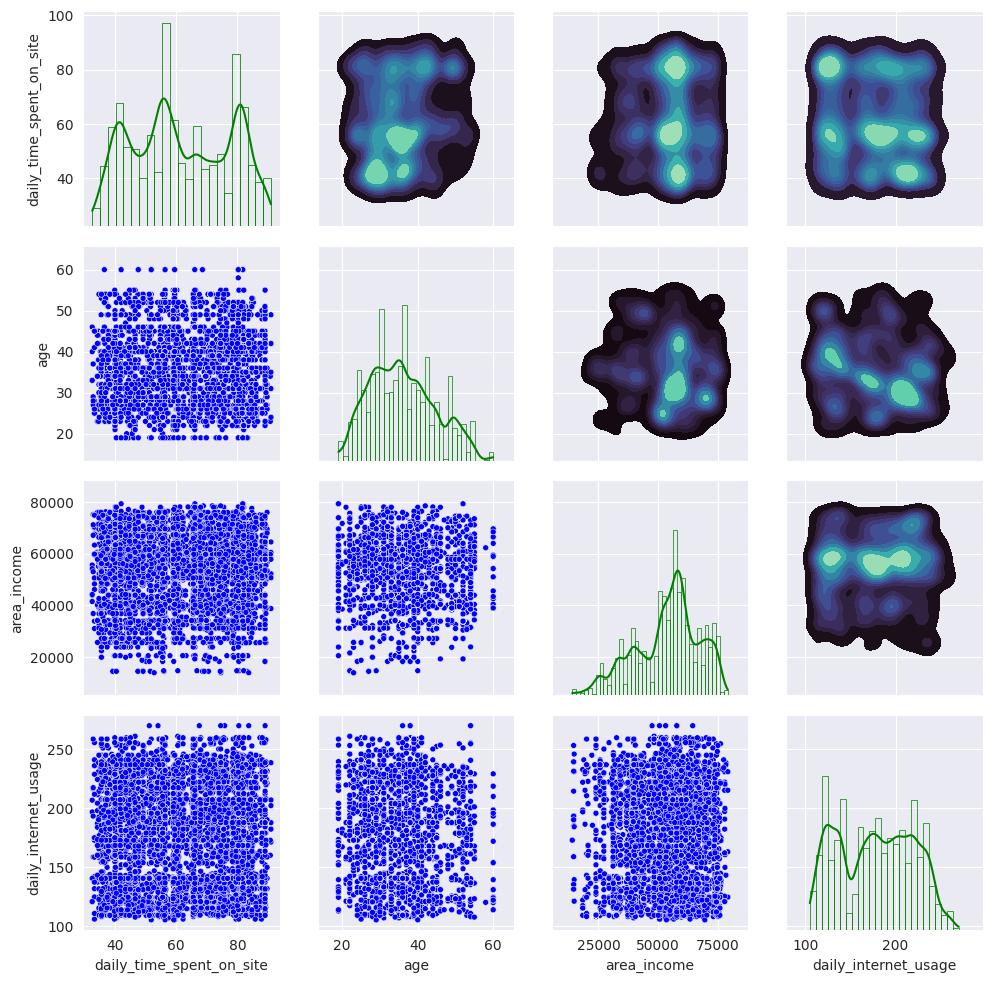

In [15]:
g = sns.PairGrid(df[numerical_columns], palette = "dark")
g.map_lower(sns.scatterplot, size = 3, color = 'blue')
g.map_diag(sns.histplot, 
           color = 'green', 
           fill = False, 
           kde = True)
g.map_upper(sns.kdeplot, fill = True, cmap = 'mako')
g.fig.show()

In [16]:
X = df.drop("clicked_on_ad", axis = 1)
y = df["clicked_on_ad"]

In [17]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 daily_time_spent_on_site    0
age                         0
area_income                 0
daily_internet_usage        0
ad_topic_line               0
city                        0
gender                      0
country                     0
timestamp                   0
clicked_on_ad               0
dtype: int64


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
# Initialize label encoders
label_encoders = {}
categorical_columns = ['ad_topic_line', 'city', 'gender', 'country']

# Apply label encoding
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [20]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d_%H:%M:%S')

# Extract useful features from timestamp
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

# Drop the original timestamp column
df = df.drop(columns=['timestamp'])

print(df)

      daily_time_spent_on_site   age  area_income  daily_internet_usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   
9999                     46.61  43.0     60575.99                198.45   

      ad_topic_line  city  gender  country  clicked_on_ad  year  month  day  \
0                96 

In [21]:
df

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,gender,country,clicked_on_ad,year,month,day,hour
0,62.26,32.0,69481.85,172.83,96,234,1,174,0,2016,6,9,21
1,41.73,31.0,61840.26,207.17,301,460,1,166,0,2016,1,16,17
2,44.40,30.0,57877.15,172.83,484,379,0,71,0,2016,6,29,10
3,59.88,28.0,56180.93,207.17,24,269,0,205,0,2016,6,21,14
4,49.21,30.0,54324.73,201.58,484,495,0,149,1,2016,7,21,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,353,460,1,166,1,2016,1,3,3
9996,41.73,28.0,51501.38,120.49,241,177,1,105,0,2016,5,28,12
9997,55.60,39.0,38067.08,124.44,222,316,0,48,0,2016,1,5,11
9998,46.61,50.0,43974.49,123.13,396,321,0,108,1,2016,4,4,7


In [22]:
# Features (X) and target (y)
X = df.drop(columns=['clicked_on_ad'])
y = df['clicked_on_ad']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [26]:
# Make predictions
y_pred = model.predict(X_test_scaled)


In [27]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 74.45%
Confusion Matrix:
[[801 213]
 [298 688]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1014
           1       0.76      0.70      0.73       986

    accuracy                           0.74      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.75      0.74      0.74      2000



In [28]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the RandomForest model
rf_model.fit(X_train_scaled, y_train)

# Predict using the trained model
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


Random Forest Accuracy: 84.35%


In [29]:
# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Classifier Accuracy: {accuracy * 100:.2f}%")

Gradient Boosting Classifier Accuracy: 82.05%


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")




Precision: 0.84
Recall: 0.79
F1-Score: 0.81
ROC AUC: 0.91



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1014
           1       0.84      0.79      0.81       986

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



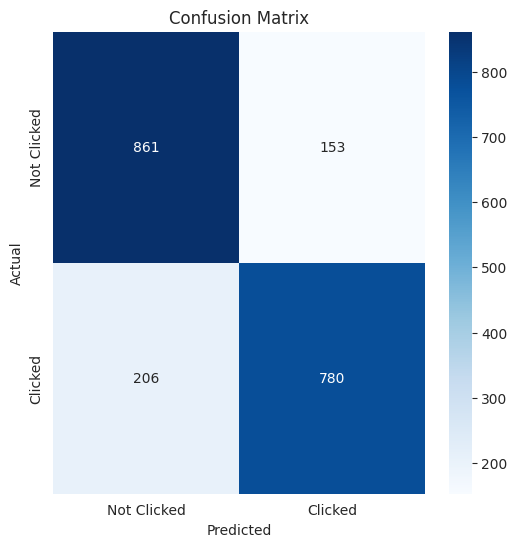

In [31]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

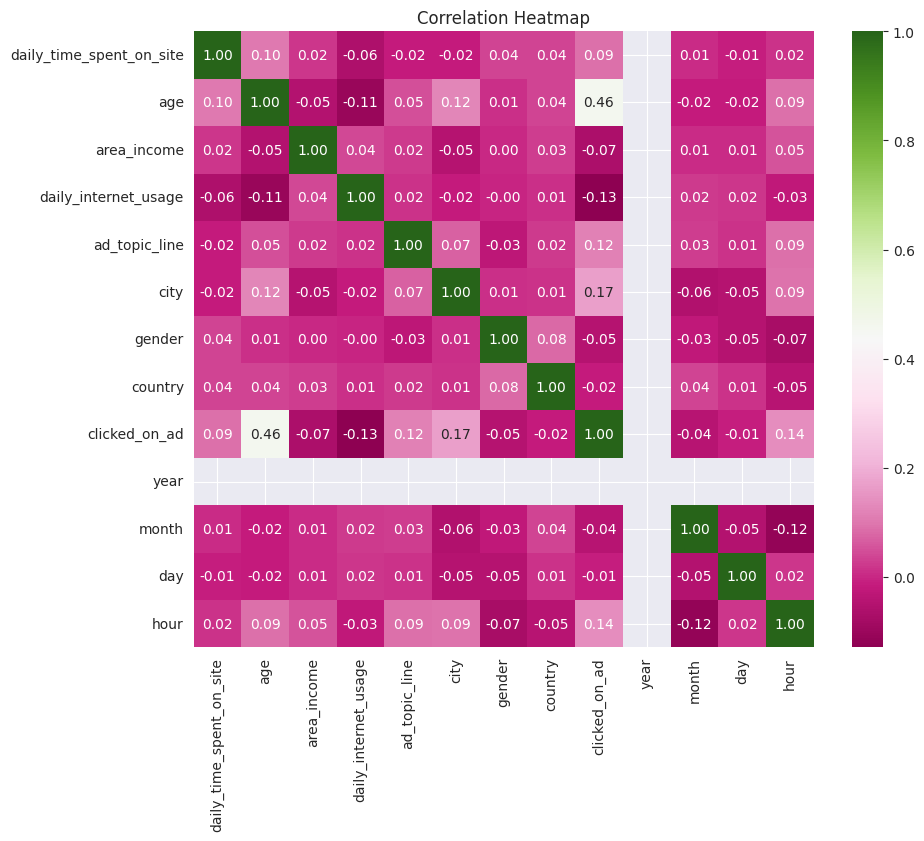

In [32]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [33]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')


['xgboost_model.pkl']